# Ejemplo 

De la aproximción a la primera derivada de la función $f(x)$  en el punto $x=0.5$ usando diferencias finitas centradas de orden $O(h^2)$, encontrar el valor $h_{opt}$ para el cual los errores se minimizan.

$$f(x)=-0.1x^4-0.15x^3-0.5x^2-0.25x+1.2$$

y donde 

$$h_{opt}=\sqrt[3]{\frac{3\varepsilon}{M}}$$

Graficar el tamaño del paso paso $h$ contra el error total para cada uno de los pasos.

h = 1.000000e+00, df-aprox = -1.2625000000, Error = 3.500000e-01
h = 1.000000e-01, df-aprox = -0.9160000000, Error = 3.500000e-03
h = 1.000000e-02, df-aprox = -0.9125350000, Error = 3.500000e-05
h = 1.000000e-03, df-aprox = -0.9125003500, Error = 3.500000e-07
h = 1.000000e-04, df-aprox = -0.9125000035, Error = 3.499850e-09
h = 1.000000e-05, df-aprox = -0.9125000000, Error = 3.317835e-11
h = 1.000000e-06, df-aprox = -0.9125000000, Error = 5.422773e-12
h = 1.000000e-07, df-aprox = -0.9124999995, Error = 5.496888e-10
h = 1.000000e-08, df-aprox = -0.9125000033, Error = 3.336092e-09
h = 1.000000e-09, df-aprox = -0.9125000200, Error = 1.998944e-08
h = 1.000000e-10, df-aprox = -0.9125000755, Error = 7.550059e-08
h = 1.000000e-11, df-aprox = -0.9125034062, Error = 3.406170e-06
h = 1.000000e-12, df-aprox = -0.9124923039, Error = 7.696061e-06
h = 1.000000e-13, df-aprox = -0.9126033262, Error = 1.033262e-04
h = 1.000000e-14, df-aprox = -0.9103828802, Error = 2.117120e-03


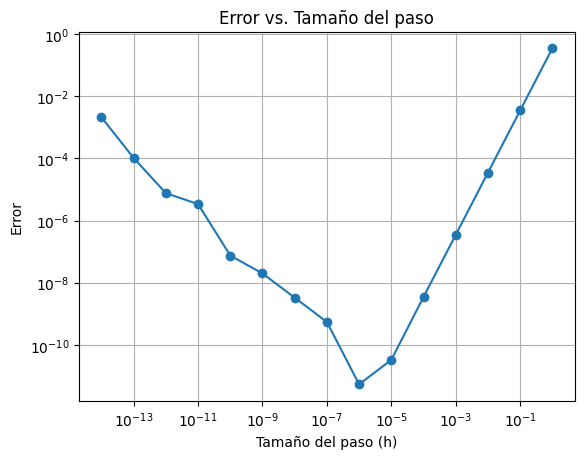

h_optimo es 5.4129921416e-06


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función a estudiar en el punto x=0.5
def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
def df(x):
    return -0.4*x**3 - 0.45*x**2 - x - 0.25
def ddf(x):
    return -1.2*x**2 - 0.9*x - 1
def dddf(x):
    return -2.4*x - 0.9

# Paso inicial
h = 1
x = 0.5
# Valor verdadero de la derivada en x = 0.5
df_verd = df(x)



# Arreglos iniciales
h_val = []
der_aprox_v = []
errores = []

# Ciclo para calcular el error dividiendo el paso en cada vuelta sobre 10
for i in range(15):
    # Aproximación por diferencias finitas centradas de O(h^2)
    der_aprox = (f(x + h) - f(x - h)) / (2 * h)
    
    # Vectores de valores
    h_val.append(h) # tamaño de paso
    der_aprox_v.append(der_aprox) # derivada aproximada f'-tilde
    errores.append(abs(df_verd - der_aprox)) # error
    
    # Tabla 
    print(f'h = {h:e}, df-aprox = {der_aprox:.10f}, Error = {abs(df_verd - der_aprox):e}')
    
    # Se reduce el paso 1/10 para el siguiente ciclo
    h /= 10

# Gráfica log-log
plt.loglog(h_val, errores, '-o')
plt.xlabel('Tamaño del paso (h)')
plt.ylabel('Error')
plt.title('Error vs. Tamaño del paso')
plt.grid(True)
plt.show()

# Calcular h óptimo
epsilon_maquina = np.finfo(float).eps # calculo del epsilon de la maquina
h_optimo = (3 * abs(epsilon_maquina) * x / abs(dddf(x)))**(1/3)
print(f'h_optimo es {h_optimo:.10e}')

# Tarea 2
1. Supongamos que ahora la medición tiene una precisión de cuatro dígitos. Tomemos el punto $x_0=0.0501$ y considera el $\varepsilon=1\times10^{-5}$ el error de la medición. a) A través del ciclo que divide el intervalo $h/10$ en cada paso aproxima el valor de $h_{opt}$. b) Calcula el valor de $h_{opt}$ usando la expresión (1). Hint: usa la función *round* de Python para obtener un redondeo de los valores $f(x_0)$, $f'_{aprox}(x)$, $f'_{real}(x)$ y $f^{(3)}(x_0)$.

2. Calcula el valor optimo del tamaño de paso usando el epsilon de la maquina para las siguientes funciones en los puntos especificados.

   a) La velocidad institantea de un cuerpo en caida libre en el tiempo $t_0=12$ que siga la ecuación $$v(t)=\frac{98.1\times68.1}{12.5}\left(1-e^{-\left(\frac{c}{m}\right)t}\right)$$.

   b) La corriente al tiempo $t=2$ en un circuito  RCL cuya ecuación se representa para un caso particular como $$I(t)=e^{-\gamma t}A\text{cos}(\omega t+\alpha)$$ donde $\gamma=\frac{R}{LC}$, $\omega=\sqrt{\frac{1}{LC}-\frac{R^2}{4L^2}}$, y el circuito esta descrito por $R=200\,\Omega$, $L=5\,H$, $C=10^{-4}\,F$, $A=1$ y $\alpha=\pi/2$.
